USED PACKAGES

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kruskal
from scipy.stats import skew, kurtosis, shapiro, kstest
from scipy.stats import norm, poisson, binom, beta, uniform, expon, gamma

In [2]:
df = pd.read_csv('courses.csv', index_col=0)
has_nulls = df.isnull().any()
print(has_nulls)


Course_Name            False
Category               False
Duration (hours)       False
Enrolled_Students      False
Completion_Rate (%)    False
Platform               False
Price ($)              False
Rating (out of 5)      False
dtype: bool


looking if there are any duplicates based on the name of the course

In [3]:
course_counts = df['Course_Name'].value_counts()

duplicates = course_counts[course_counts > 1]
print(duplicates)

Series([], Name: count, dtype: int64)


looking for outliers on each numerical column;
a value is an outlier if its value is lower than q1-1.5*iqr or higher than q3+1.5*iqr

In [4]:
outliers_dict = {}

for column in df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]
    
    outliers_dict[column] = outliers

for col, outliers in outliers_dict.items():
    print(f"Outliers for {col}:\n{outliers}\n")

Outliers for Duration (hours):
Empty DataFrame
Columns: [Course_Name, Category, Duration (hours), Enrolled_Students, Completion_Rate (%), Platform, Price ($), Rating (out of 5)]
Index: []

Outliers for Enrolled_Students:
Empty DataFrame
Columns: [Course_Name, Category, Duration (hours), Enrolled_Students, Completion_Rate (%), Platform, Price ($), Rating (out of 5)]
Index: []

Outliers for Completion_Rate (%):
Empty DataFrame
Columns: [Course_Name, Category, Duration (hours), Enrolled_Students, Completion_Rate (%), Platform, Price ($), Rating (out of 5)]
Index: []

Outliers for Price ($):
Empty DataFrame
Columns: [Course_Name, Category, Duration (hours), Enrolled_Students, Completion_Rate (%), Platform, Price ($), Rating (out of 5)]
Index: []

Outliers for Rating (out of 5):
Empty DataFrame
Columns: [Course_Name, Category, Duration (hours), Enrolled_Students, Completion_Rate (%), Platform, Price ($), Rating (out of 5)]
Index: []



bpx plot for every numerical data for a better visualisation

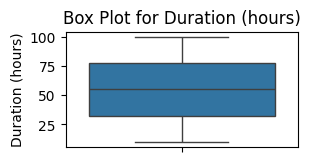

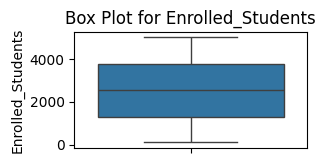

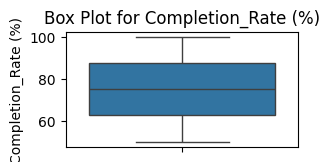

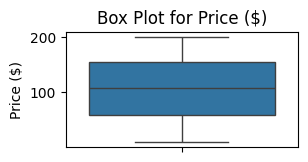

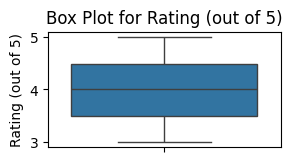

In [5]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

for column in numerical_cols:
    plt.figure(figsize=(3, 1.5))
    sns.boxplot(y=df[column])  
    plt.title(f'Box Plot for {column}')
    plt.ylabel(column)
    plt.show()

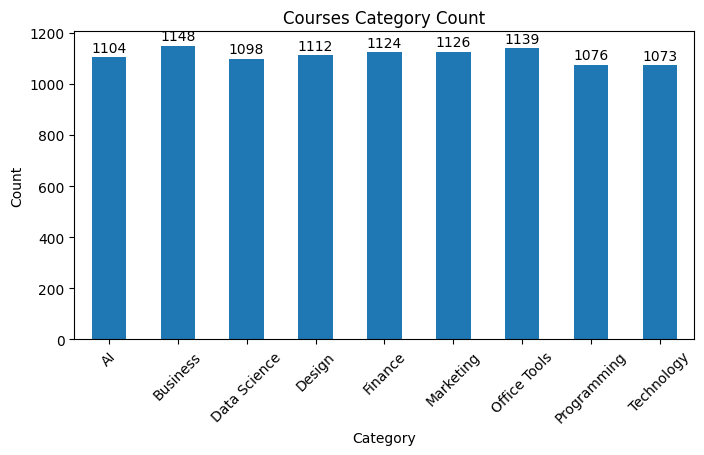

In [7]:
category = df.groupby('Category')['Category'].count()

plt.figure(figsize=(8, 4))
for i, v in enumerate(category.values):
    plt.text(i, v + 10, str(v), ha='center', va='bottom')
category.plot(kind='bar')
plt.title('Courses Category Count')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



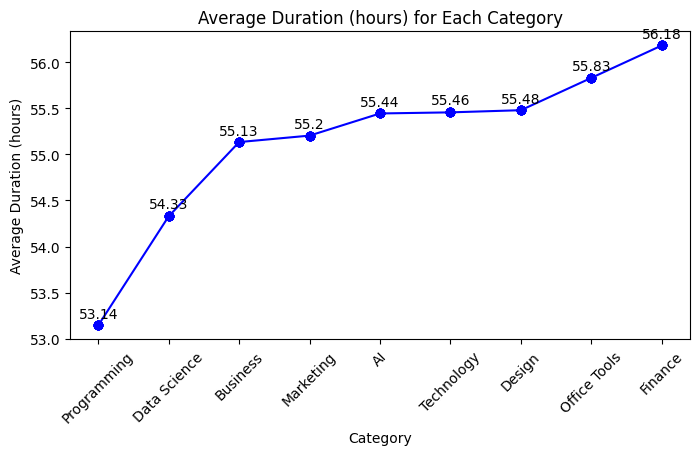

In [8]:
avg_duration = df.groupby('Category')['Duration (hours)'].mean().sort_values(ascending=True)

plt.figure(figsize=(8, 4) ,linewidth=2)
for i, v in enumerate(avg_duration.values):
    plt.text(i, round(v, 2) + .05, str(round(v, 2)), ha='center', va='bottom')
    plt.plot(avg_duration.index, avg_duration.values, 'o', color='blue')
avg_duration.plot(kind='line', color='blue')
plt.title('Average Duration (hours) for Each Category')
plt.xlabel('Category')
plt.ylabel('Average Duration (hours)')
plt.xticks(rotation=45)
plt.show()

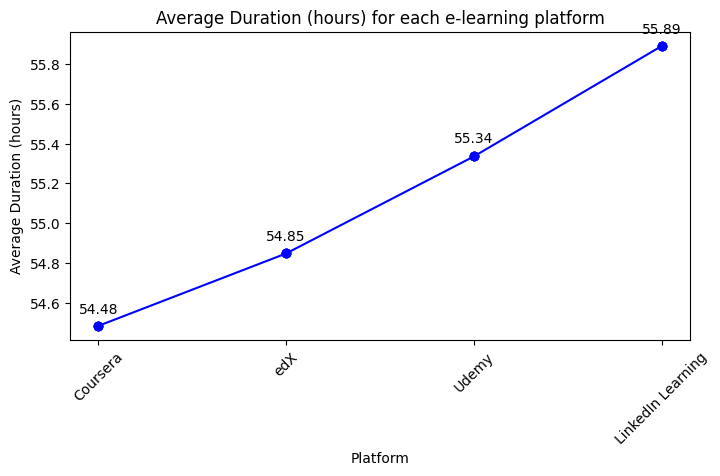

In [9]:
avg_duration = df.groupby('Platform')['Duration (hours)'].mean().sort_values(ascending=True)

plt.figure(figsize=(8, 4) ,linewidth=2)
for i, v in enumerate(avg_duration.values):
    plt.text(i, round(v, 2) + .05, str(round(v, 2)), ha='center', va='bottom')
    plt.plot(avg_duration.index, avg_duration.values, 'o', color='blue')
avg_duration.plot(kind='line', color='blue')
plt.title('Average Duration (hours) for each e-learning platform')
plt.xlabel('Platform')
plt.ylabel('Average Duration (hours)')
plt.xticks(rotation=45)
plt.show()

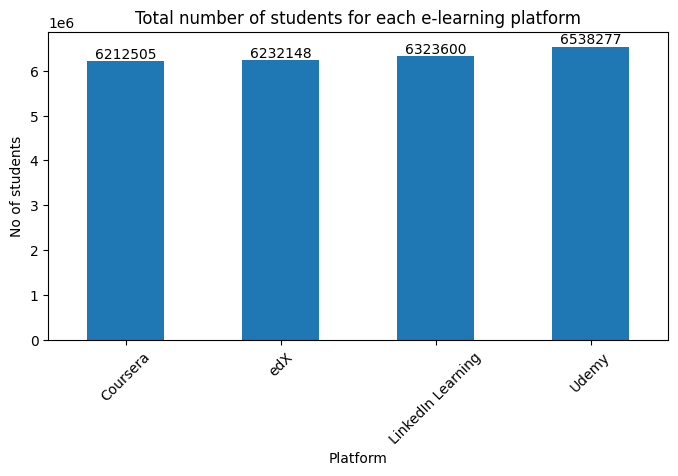

In [10]:
avg_enrolled_stud = df.groupby('Platform')['Enrolled_Students'].sum().sort_values(ascending=True)

plt.figure(figsize=(8, 4) ,linewidth=2)
for i, v in enumerate(avg_enrolled_stud.values):
    plt.text(i, v + .05, str(v), ha='center', va='bottom')
avg_enrolled_stud.plot(kind='bar')
plt.title('Total number of students for each e-learning platform')
plt.xlabel('Platform')
plt.ylabel('No of students')
plt.xticks(rotation=45)
plt.show()

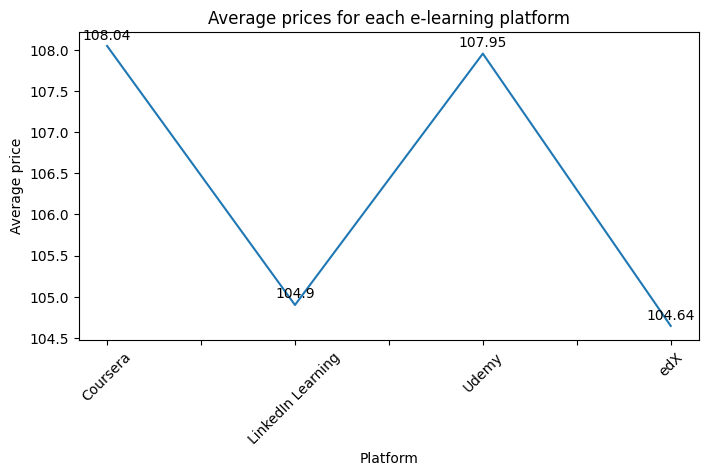

In [11]:
avg_price = df.groupby('Platform')['Price ($)'].mean()

plt.figure(figsize=(8, 4) ,linewidth=2)
for i, v in enumerate(avg_price.values):
    plt.text(i, round(v,2) + .05, str(round(v, 2)), ha='center', va='bottom')
avg_price.plot(kind='line')
plt.title('Average prices for each e-learning platform')
plt.xlabel('Platform')
plt.ylabel('Average price')
plt.xticks(rotation=45)
plt.show()

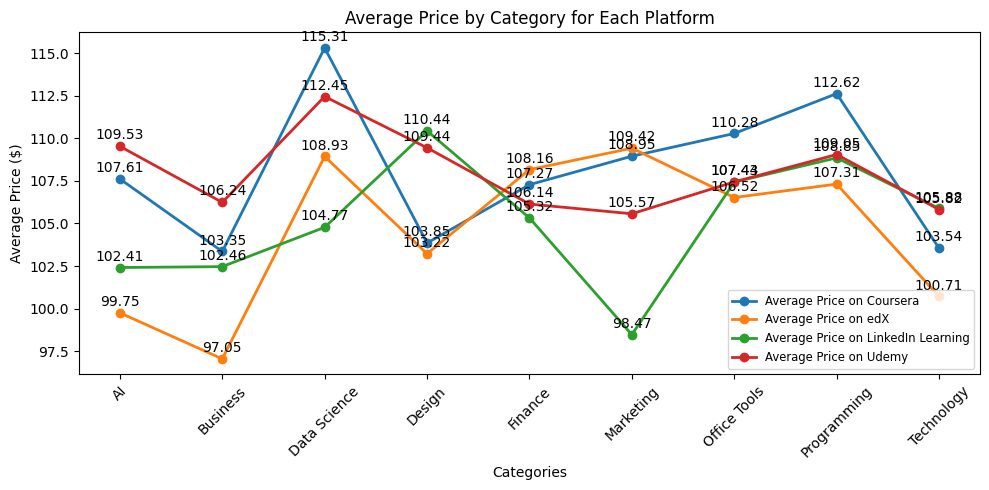

In [12]:
unique_platforms = df['Platform'].unique()

plt.figure(figsize=(10, 5))

for platform in unique_platforms:
    platform_price = df[df['Platform'] == platform].groupby('Category')['Price ($)'].mean()
    line_plot = platform_price.plot(kind='line', marker='o', linewidth=2, label=f'Average Price on {platform}')
    for i, v in enumerate(platform_price):
        line_plot.annotate(f'{v:.2f}', xy=(i, v), xytext=(0, 5), textcoords='offset points', ha='center')

plt.title('Average Price by Category for Each Platform')
plt.xlabel('Categories')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.tight_layout()

plt.legend(fontsize='small', loc='lower right')
plt.show()


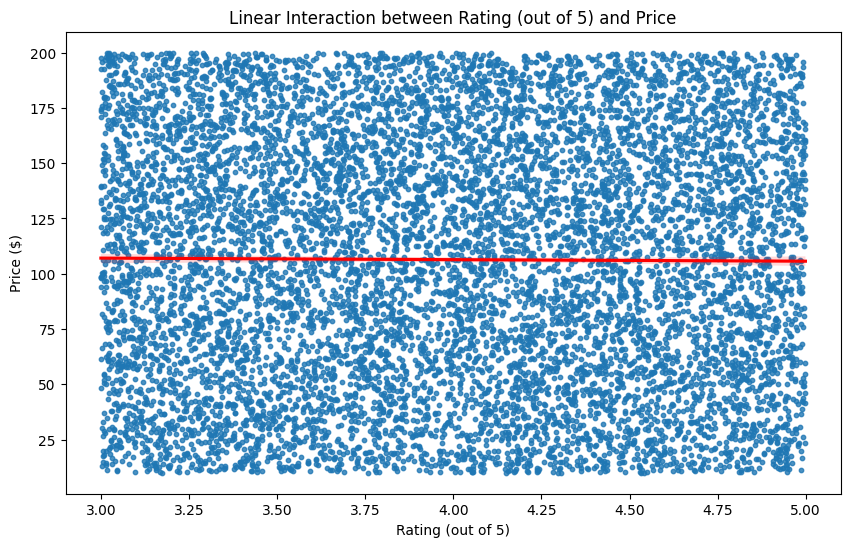

In [13]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Rating (out of 5)', y='Price ($)', data=df, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title('Linear Interaction between Rating (out of 5) and Price')
plt.xlabel('Rating (out of 5)')
plt.ylabel('Price ($)')
plt.show()

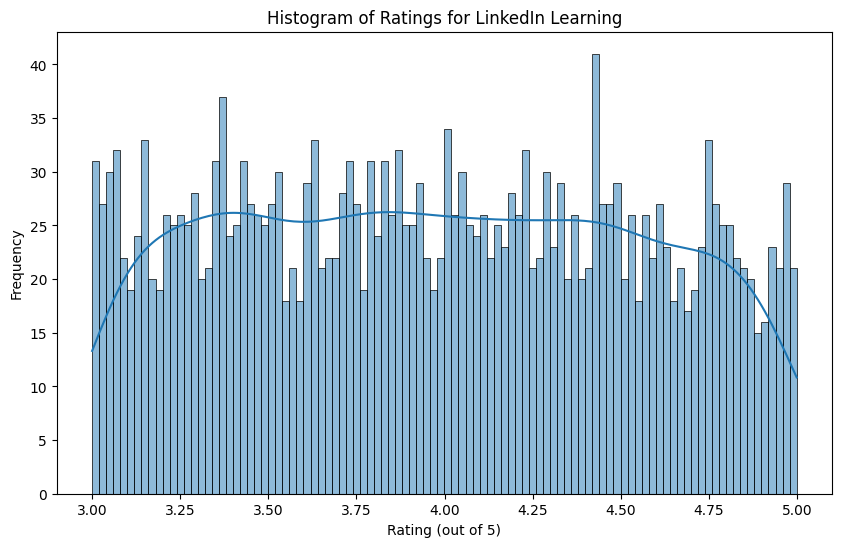

In [14]:
coursera_df = df[df['Platform'] == 'LinkedIn Learning']	
plt.figure(figsize=(10, 6))
sns.histplot(coursera_df['Rating (out of 5)'], bins=100, kde=True)
plt.title('Histogram of Ratings for LinkedIn Learning')
plt.xlabel('Rating (out of 5)')
plt.ylabel('Frequency')
plt.show()



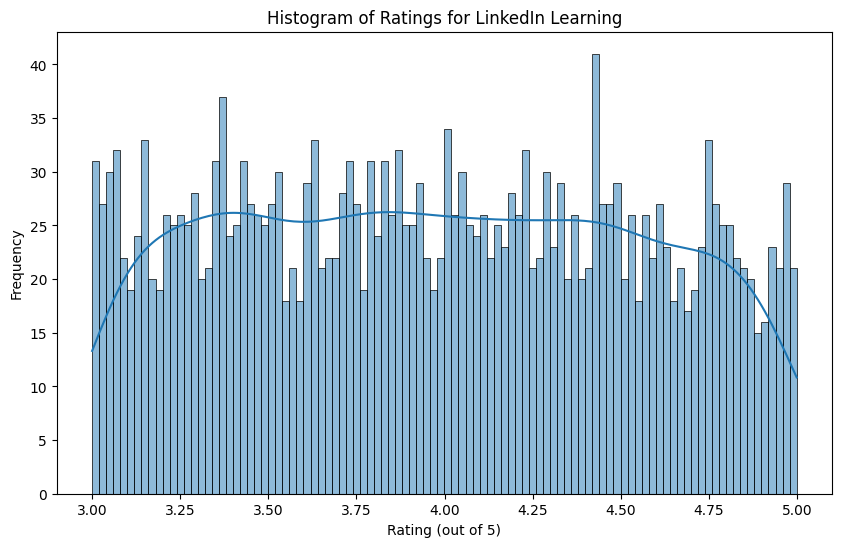

Skewness: 0.039215147201505596
Kurtosis: -1.1601947956846996
Shapiro-Wilk Test: Statistic=0.9587102131528625, p-value=4.3773346116941075e-26
The distribution is likely not normal (rejects null hypothesis).


In [ ]:

linkedin_df = df[df['Platform'] == 'LinkedIn Learning']

plt.figure(figsize=(10, 6))
sns.histplot(linkedin_df['Rating (out of 5)'], bins=100, kde=True)
plt.title('Histogram of Ratings for LinkedIn Learning')
plt.xlabel('Rating (out of 5)')
plt.ylabel('Frequency')
plt.show()

rating_data = linkedin_df['Rating (out of 5)'].dropna()  
skewness = skew(rating_data)
kurt = kurtosis(rating_data)
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurt}")

shapiro_test = shapiro(rating_data)
print(f"Shapiro-Wilk Test: Statistic={shapiro_test.statistic}, p-value={shapiro_test.pvalue}")

if shapiro_test.pvalue < 0.05:
    print("The distribution is likely not normal (rejects null hypothesis).")
else:
    print("The distribution might be normal (fails to reject null hypothesis).")


In [ ]:
NOT READY YET

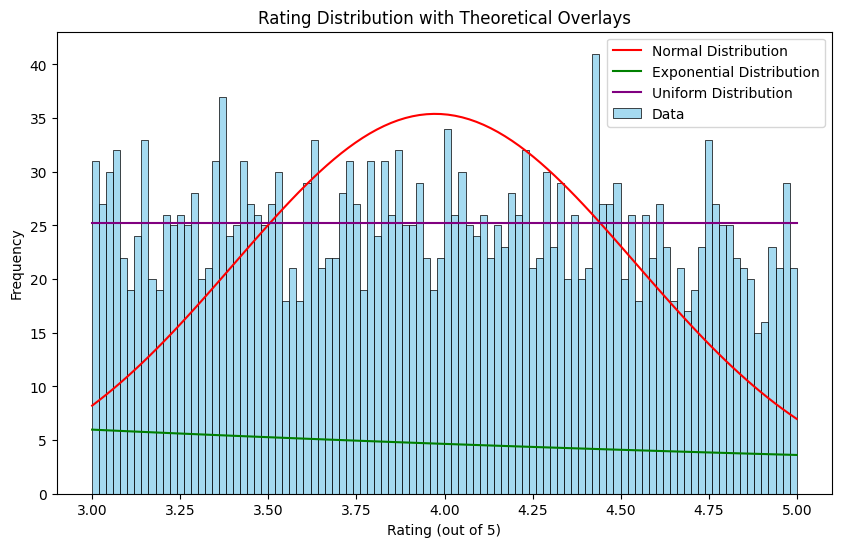

KS Test for Normal Distribution: Statistic=0.06185340360601921, p-value=9.241094779483368e-09
Anderson-Darling Test Statistic for Normal Distribution: 24.619641539970416
Critical Values: [0.575 0.655 0.786 0.917 1.09 ]


In [ ]:

plt.figure(figsize=(10, 6))
sns.histplot(rating_data, bins=100, kde=False, color="skyblue", label="Data")

# Normal Distribution
x = np.linspace(min(rating_data), max(rating_data), 100)
plt.plot(x, norm.pdf(x, rating_data.mean(), rating_data.std()) * len(rating_data) * (x[1]-x[0]), 
         color='red', label="Normal Distribution")

# Exponential Distribution
plt.plot(x, expon.pdf(x, scale=rating_data.mean()) * len(rating_data) * (x[1]-x[0]), 
         color='green', label="Exponential Distribution")

# Uniform Distribution
plt.plot(x, uniform.pdf(x, min(rating_data), max(rating_data)-min(rating_data)) * len(rating_data) * (x[1]-x[0]), 
         color='purple', label="Uniform Distribution")

plt.title("Rating Distribution with Theoretical Overlays")
plt.xlabel("Rating (out of 5)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

from scipy.stats import kstest, anderson

# Kolmogorov-Smirnov Test for Normal Distribution
ks_normal = kstest(rating_data, 'norm', args=(rating_data.mean(), rating_data.std()))
print(f"KS Test for Normal Distribution: Statistic={ks_normal.statistic}, p-value={ks_normal.pvalue}")

# Anderson-Darling Test
ad_test = anderson(rating_data, dist='norm')
print(f"Anderson-Darling Test Statistic for Normal Distribution: {ad_test.statistic}")
print("Critical Values:", ad_test.critical_values)

from scipy.stats import expon, beta, uniform

# Fit Exponential Distribution
exp_params = expon.fit(rating_data)
print("Exponential Fit Parameters:", exp_params)

# Fit Uniform Distribution
uniform_params = uniform.fit(rating_data)
print("Uniform Fit Parameters:", uniform_params)

# Fit Beta Distribution (requires data normalization)
normalized_data = (rating_data - min(rating_data)) / (max(rating_data) - min(rating_data))
beta_params = beta.fit(normalized_data)
print("Beta Fit Parameters:", beta_params)




In [19]:
from scipy.stats import shapiro

stat, p = shapiro(coursera_df ['Rating (out of 5)'])
print(f'Statistics={stat}, p-value={p}')
if p > 0.05:
    print('Sample is normally distributed')
else:
    print('Sample is not normally distributed')

    from sklearn.preprocessing import StandardScaler



Statistics=0.9587102131528625, p-value=4.3773346116941075e-26
Sample is not normally distributed


NOT READY YET

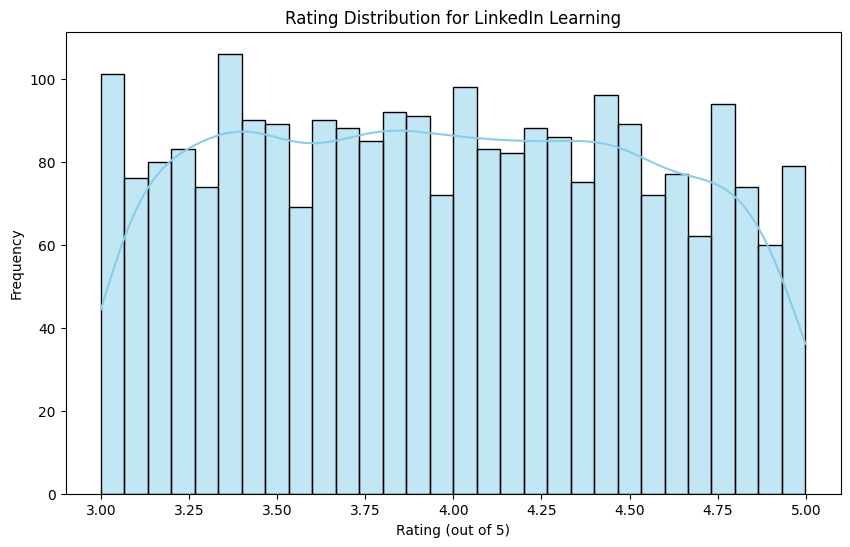

normal distribution: Normal Fit
Mean=3.97, Std Dev=0.57
poisson distribution: Poisson Fit
λ=3.97
binomial distribution: Binomial Fit
n=5, p=0.79


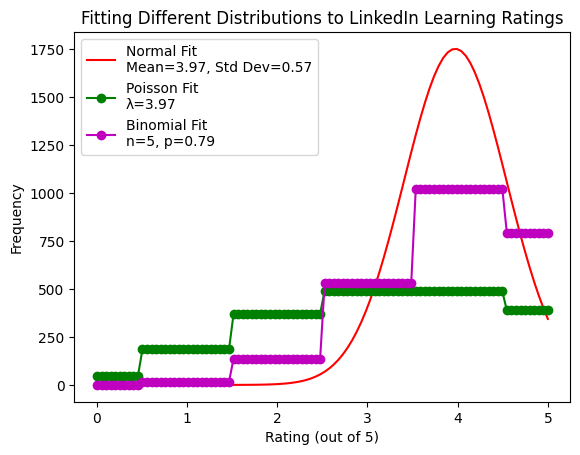

In [ ]:
coursera_df = df[df['Platform'] == 'LinkedIn Learning']

plt.figure(figsize=(10, 6))
sns.histplot(coursera_df['Rating (out of 5)'], bins=30, kde=True, color="skyblue")
plt.xlabel("Rating (out of 5)")
plt.ylabel("Frequency")
plt.title("Rating Distribution for LinkedIn Learning")
plt.show()

ratings = coursera_df['Rating (out of 5)']
total_observations = len(ratings)

# Calculate mean and variance for fitting purposes
mean = np.mean(ratings)
variance = np.var(ratings)
std_dev = np.sqrt(variance)

# Fit Normal distribution and overlay
x = np.linspace(0, 5, 100)
pdf_norm = norm.pdf(x, mean, std_dev) * total_observations  # Scale to match frequencies
plt.plot(x, pdf_norm, 'r-', label=f'Normal Fit\nMean={mean:.2f}, Std Dev={std_dev:.2f}')

# Fit Poisson distribution (if ratings are integer-like and modeled as counts)
# Lambda for Poisson is the mean
poisson_lambda = mean
pdf_poisson = poisson.pmf(np.round(x), poisson_lambda) * total_observations
plt.plot(x, pdf_poisson, 'go-', label=f'Poisson Fit\nλ={poisson_lambda:.2f}')

# Fit Binomial distribution (if ratings can be thought of as counts out of 5)
n_trials = 5
prob_success = mean / n_trials
pdf_binom = binom.pmf(np.round(x), n_trials, prob_success) * total_observations
plt.plot(x, pdf_binom, 'mo-', label=f'Binomial Fit\nn={n_trials}, p={prob_success:.2f}')

print("normal distribution:", f'Normal Fit\nMean={mean:.2f}, Std Dev={std_dev:.2f}' )
print("poisson distribution:", f'Poisson Fit\nλ={poisson_lambda:.2f}')
print("binomial distribution:", f'Binomial Fit\nn={n_trials}, p={prob_success:.2f}')	

plt.legend()
plt.xlabel("Rating (out of 5)")
plt.ylabel("Frequency")
plt.title("Fitting Different Distributions to LinkedIn Learning Ratings")
plt.show()



chechink for normal distribution

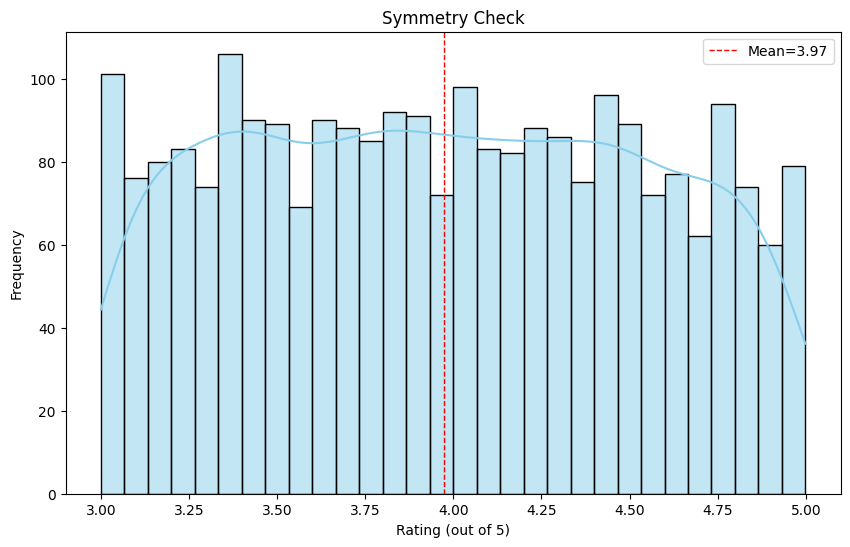

Mean: 3.97, Median: 3.97, Mode: 3.00
Skewness: 0.04
Kurtosis: 1.84 (Normal Kurtosis = 3)
Within 1 Std Dev: 58.70% (Expected ~68%)
Within 2 Std Dev: 100.00% (Expected ~95%)
Within 3 Std Dev: 100.00% (Expected ~99.7%)


In [ ]:
ratings = coursera_df['Rating (out of 5)']

# 1. Check symmetry with a histogram and KDE plot
plt.figure(figsize=(10, 6))
sns.histplot(ratings, bins=30, kde=True, color="skyblue")
plt.axvline(ratings.mean(), color='red', linestyle='dashed', linewidth=1, label=f'Mean={ratings.mean():.2f}')
plt.xlabel("Rating (out of 5)")
plt.ylabel("Frequency")
plt.legend()
plt.title("Symmetry Check")
plt.show()

# 2. Check Mean, Median, and Mode
mean = ratings.mean()
median = ratings.median()
mode = ratings.mode()[0]  # mode() returns a Series, so get the first mode if multiple
print(f"Mean: {mean:.2f}, Median: {median:.2f}, Mode: {mode:.2f}")

# 3. Check skewness and kurtosis
skewness = skew(ratings)
kurt = kurtosis(ratings) + 3  # Adjust for Fisher's definition to match normal kurtosis of 3
print(f"Skewness: {skewness:.2f}")
print(f"Kurtosis: {kurt:.2f} (Normal Kurtosis = 3)")

# 4. Check the Empirical Rule (68-95-99.7)
mean, std_dev = ratings.mean(), ratings.std()
within_1_std = np.sum((ratings > mean - std_dev) & (ratings < mean + std_dev)) / len(ratings) * 100
within_2_std = np.sum((ratings > mean - 2 * std_dev) & (ratings < mean + 2 * std_dev)) / len(ratings) * 100
within_3_std = np.sum((ratings > mean - 3 * std_dev) & (ratings < mean + 3 * std_dev)) / len(ratings) * 100

print(f"Within 1 Std Dev: {within_1_std:.2f}% (Expected ~68%)")
print(f"Within 2 Std Dev: {within_2_std:.2f}% (Expected ~95%)")
print(f"Within 3 Std Dev: {within_3_std:.2f}% (Expected ~99.7%)")



beta distribution: first divide the cores by 5 so it can fir between 0 and 1
still not a good choice

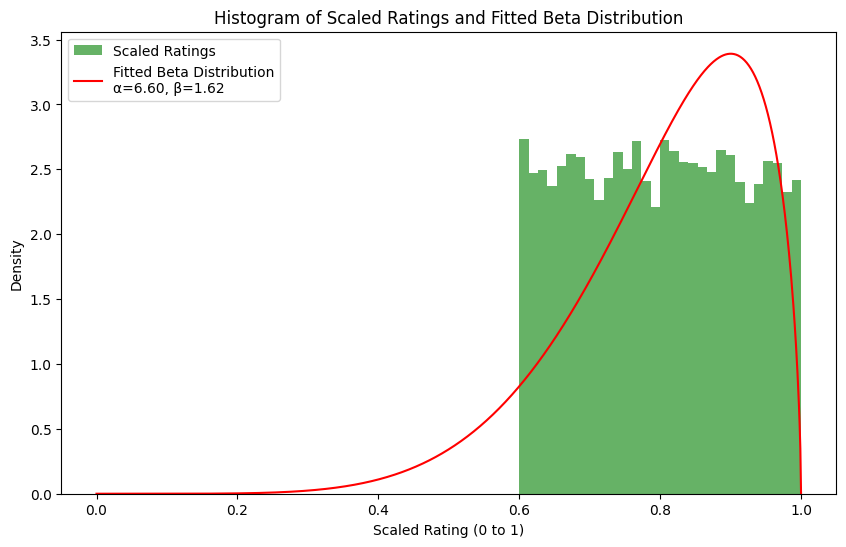

KS Statistic: 0.08481257163628897, p-value: 4.994069697633231e-63


In [22]:
df['Scaled Rating'] = df['Rating (out of 5)'] / 5

from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np

# Get the scaled ratings
scaled_ratings = df['Scaled Rating']

# Fit the Beta distribution to the data
alpha, beta_param, loc, scale = beta.fit(scaled_ratings, floc=0, fscale=1)

# Generate the x values (scaled ratings between 0 and 1)
x = np.linspace(0, 1, 1000)

# Get the PDF of the fitted Beta distribution
pdf_fitted = beta.pdf(x, alpha, beta_param, loc, scale)

# Plot the histogram of the scaled ratings and the fitted Beta distribution
plt.figure(figsize=(10, 6))
plt.hist(scaled_ratings, bins=30, density=True, alpha=0.6, color='g', label='Scaled Ratings')
plt.plot(x, pdf_fitted, 'r-', label=f'Fitted Beta Distribution\nα={alpha:.2f}, β={beta_param:.2f}')
plt.title('Histogram of Scaled Ratings and Fitted Beta Distribution')
plt.xlabel('Scaled Rating (0 to 1)')
plt.ylabel('Density')
plt.legend()
plt.show()


from scipy.stats import kstest

# Perform Kolmogorov-Smirnov test
D_statistic, p_value = kstest(scaled_ratings, 'beta', args=(alpha, beta_param))

print(f"KS Statistic: {D_statistic}, p-value: {p_value}")



check for gamma distribution

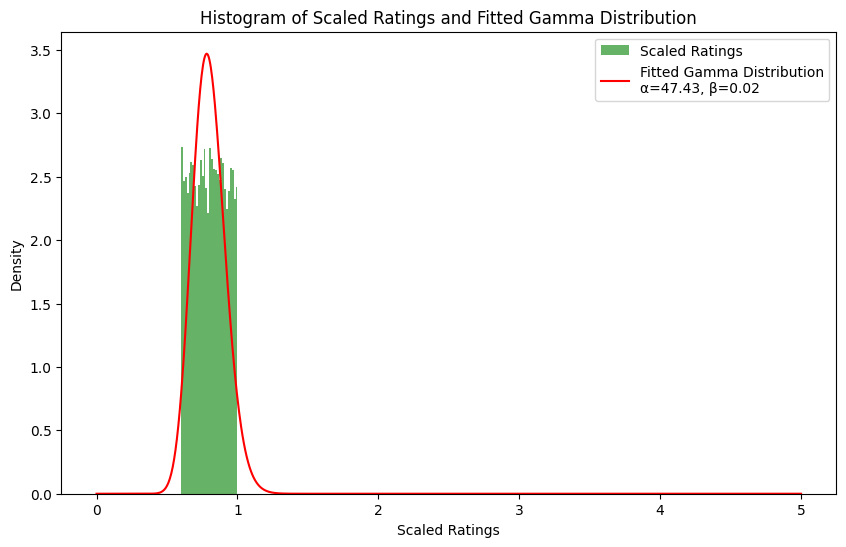

Fitted Gamma Distribution Parameters: α=47.43, β=0.02
KS Statistic: 0.06246613050664018, p-value: 2.300030434883706e-34


In [23]:
# Fit the Gamma distribution to your scaled ratings
params = gamma.fit(scaled_ratings, floc=0)  # Fixing location at 0

# Parameters of the Gamma distribution: shape (alpha), scale (beta)
alpha, loc, beta = params

# Generate the x values for plotting
x = np.linspace(0, 5, 1000)

# Plot the fitted Gamma distribution alongside your data
plt.figure(figsize=(10, 6))
plt.hist(scaled_ratings, bins=30, density=True, alpha=0.6, color='g', label='Scaled Ratings')
plt.plot(x, gamma.pdf(x, alpha, loc, beta), 'r-', label=f'Fitted Gamma Distribution\nα={alpha:.2f}, β={beta:.2f}')
plt.title('Histogram of Scaled Ratings and Fitted Gamma Distribution')
plt.xlabel('Scaled Ratings')
plt.ylabel('Density')
plt.legend()
plt.show()

# Print the parameters of the fitted Gamma distribution
print(f"Fitted Gamma Distribution Parameters: α={alpha:.2f}, β={beta:.2f}")

from scipy.stats import kstest

# Perform Kolmogorov-Smirnov test to check goodness of fit
D_statistic, p_value = kstest(scaled_ratings, 'gamma', args=(alpha, loc, beta))

print(f"KS Statistic: {D_statistic}, p-value: {p_value}")



beta distribution??

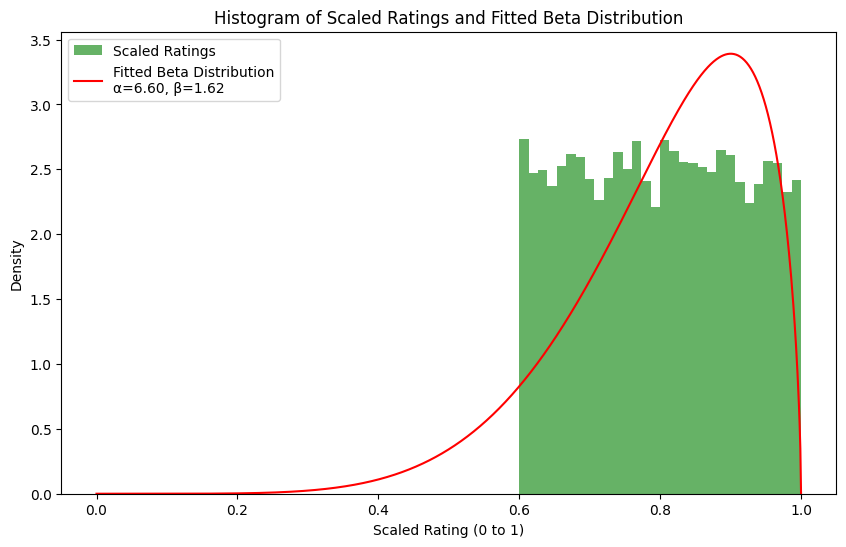

KS Statistic: 0.08481257163628897, p-value: 4.994069697633231e-63


In [28]:
df['Scaled Rating'] = df['Rating (out of 5)'] / 5

# Get the scaled ratings
scaled_ratings = df['Scaled Rating']

alpha, beta_param, loc, scale = beta.fit(scaled_ratings, floc=0, fscale=1)

# Generate the x values (scaled ratings between 0 and 1)
x = np.linspace(0, 1, 1000)

# Get the PDF of the fitted Beta distribution
pdf_fitted = beta.pdf(x, alpha, beta_param, loc, scale)

# Plot the histogram of the scaled ratings and the fitted Beta distribution
plt.figure(figsize=(10, 6))
plt.hist(scaled_ratings, bins=30, density=True, alpha=0.6, color='g', label='Scaled Ratings')
plt.plot(x, pdf_fitted, 'r-', label=f'Fitted Beta Distribution\nα={alpha:.2f}, β={beta_param:.2f}')
plt.title('Histogram of Scaled Ratings and Fitted Beta Distribution')
plt.xlabel('Scaled Rating (0 to 1)')
plt.ylabel('Density')
plt.legend()
plt.show()


from scipy.stats import kstest

# Perform Kolmogorov-Smirnov test
D_statistic, p_value = kstest(scaled_ratings, 'beta', args=(alpha, beta_param))

print(f"KS Statistic: {D_statistic}, p-value: {p_value}")



KRUSKAL WALLIS TEST - is a different in rank totals?

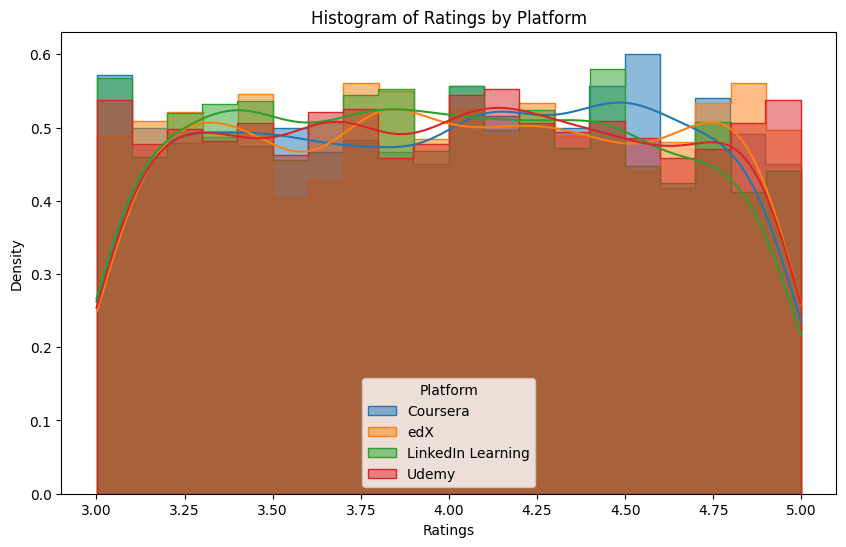

KS Test between Coursera and edX: KS-statistic = 0.0200, p-value = 0.6917
KS Test between Coursera and LinkedIn Learning: KS-statistic = 0.0363, p-value = 0.0734
KS Test between Coursera and Udemy: KS-statistic = 0.0153, p-value = 0.9234
KS Test between edX and LinkedIn Learning: KS-statistic = 0.0333, p-value = 0.1226
KS Test between edX and Udemy: KS-statistic = 0.0200, p-value = 0.6869
KS Test between LinkedIn Learning and Udemy: KS-statistic = 0.0250, p-value = 0.3980


In [30]:
plt.figure(figsize=(10, 6))
for platform in df['Platform'].unique():
    subset = df[df['Platform'] == platform]
    sns.histplot(subset['Rating (out of 5)'], bins=20, kde=True, label=platform, element='step', stat='density')

plt.legend(title='Platform')
plt.title('Histogram of Ratings by Platform')
plt.xlabel('Ratings')
plt.ylabel('Density')
plt.show()


from scipy.stats import ks_2samp

# Run KS Test for pairwise comparison between two platforms
platforms = df['Platform'].unique()

# Run pairwise KS test
for i in range(len(platforms)):
    for j in range(i+1, len(platforms)):
        group1 = df[df['Platform'] == platforms[i]]['Rating (out of 5)']
        group2 = df[df['Platform'] == platforms[j]]['Rating (out of 5)']
        ks_stat, p_value = ks_2samp(group1, group2)
        print(f"KS Test between {platforms[i]} and {platforms[j]}: KS-statistic = {ks_stat:.4f}, p-value = {p_value:.4f}")



In [ ]:
# Pivot the dataset to have one column per platform with ratings as rows
ratings_by_platform = df.pivot_table(index='Course_ID', columns='Platform', values='Rating (out of 5)')

# Calculate correlation matrix between the platforms
correlation_matrix = ratings_by_platform.corr()
print(correlation_matrix)

import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table for platforms and rating categories
df['Rating Category'] = pd.cut(df['Rating (out of 5)'], bins=[0, 1, 2, 3, 4, 5])
contingency_table = pd.crosstab(df['Platform'], df['Rating Category'])

# Perform the Chi-Square test for independence
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2}, p-value: {p_value}")



Platform           Coursera  LinkedIn Learning  Udemy  edX
Platform                                                  
Coursera                1.0                NaN    NaN  NaN
LinkedIn Learning       NaN                1.0    NaN  NaN
Udemy                   NaN                NaN    1.0  NaN
edX                     NaN                NaN    NaN  1.0
Chi-Square Statistic: 3.8095161591542923, p-value: 0.2827811804877089


In [ ]:

# 1. Extract ratings for each platform
linkedin_ratings = df[df['Platform'] == 'LinkedIn Learning']['Rating (out of 5)']
coursera_ratings = df[df['Platform'] == 'Coursera']['Rating (out of 5)']
edx_ratings = df[df['Platform'] == 'edX']['Rating (out of 5)']
udemy_ratings = df[df['Platform'] == 'Udemy']['Rating (out of 5)']

# 2. Perform Kruskal-Wallis Test
stat, p_value = kruskal(linkedin_ratings, coursera_ratings, edx_ratings, udemy_ratings)

# 3. Print the result
print(f"Kruskal-Wallis Test: Statistic={stat:.3f}, p-value={p_value:.3f}")

# Interpretation
if p_value < 0.05:
    print("There is a significant difference in ratings across the platforms.")
else:
    print("There is no significant difference in ratings across the platforms.")





Kruskal-Wallis Test: Statistic=4.502, p-value=0.212
There is no significant difference in ratings across the platforms.


In [ ]:
print(df["Category"].value_counts())    

Category
Business        1148
Office Tools    1139
Marketing       1126
Finance         1124
Design          1112
AI              1104
Data Science    1098
Programming     1076
Technology      1073
Name: count, dtype: int64


In [ ]:
categories = df['Category'].unique()  # Get unique categories
category_groups = [df[df['Category'] == category]['Rating (out of 5)'] for category in categories]

# Running the Kruskal-Wallis test
H_stat, p_value = kruskal(*category_groups)

# Print the results
print(f"Kruskal-Wallis H-statistic: {H_stat}")
print(f"p-value: {p_value}")

if p_value < 0.05:
    print("There is a significant difference in ratings across the categories.")
else:
    print("There is no significant difference in ratings across the categories.")


Kruskal-Wallis H-statistic: 8.259109396916756
p-value: 0.40857767779456106
There is no significant difference in ratings across the categories.


KDE for ratings on each platform

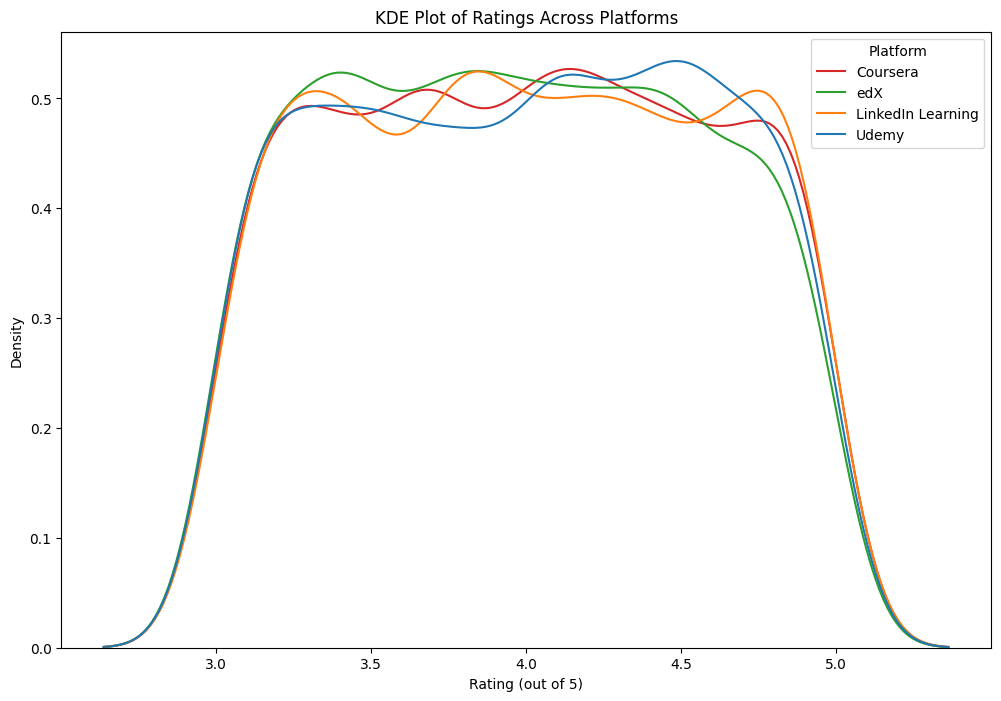

In [ ]:
plt.figure(figsize=(12, 8))
sns.kdeplot(data=df, x='Rating (out of 5)', hue='Platform', common_norm=False)

platforms = df['Platform'].unique()
plt.legend(title='Platform', labels=platforms)

plt.title('KDE Plot of Ratings Across Platforms')
plt.xlabel('Rating (out of 5)')
plt.ylabel('Density')
plt.show()



KDE for categories

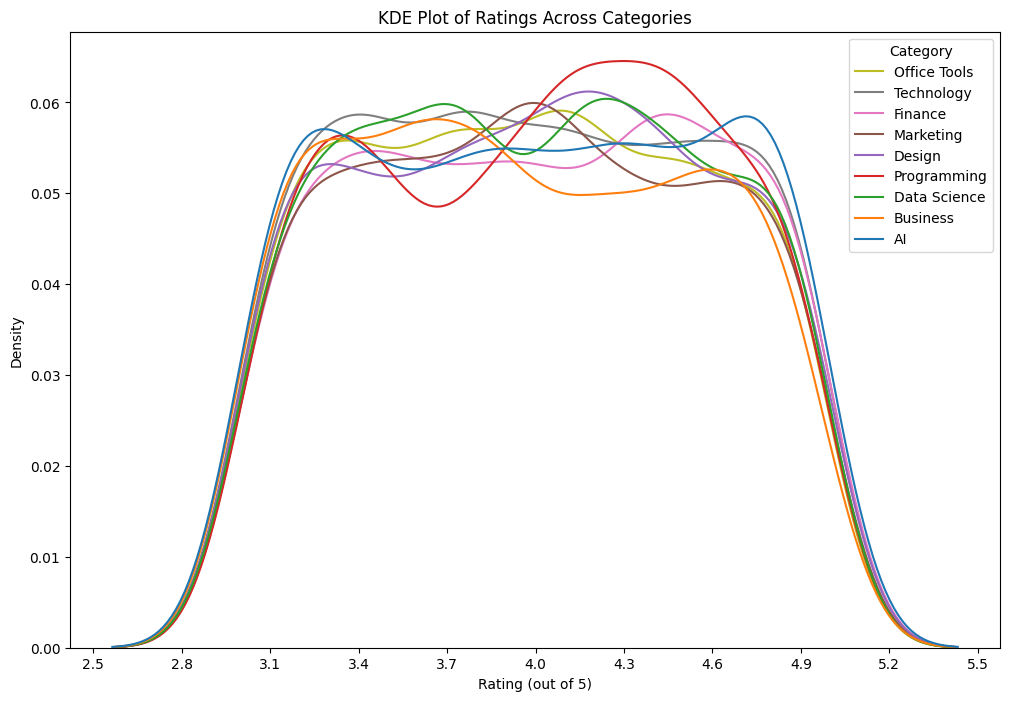

In [ ]:
plt.figure(figsize=(12, 8))
sns.kdeplot(data=df, x='Rating (out of 5)', hue='Category', common_norm=True)
custom_ticks = np.arange(2.5, 5.6, 0.3)
plt.xticks(custom_ticks)

platforms = df['Category'].unique()
plt.legend(title='Category', labels=platforms)

plt.title('KDE Plot of Ratings Across Categories')
plt.xlabel('Rating (out of 5)')
plt.ylabel('Density')
plt.show()

knn but not ready yet

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score


X = df[['Rating (out of 5)', 'Duration (hours)', 'Price ($)', 'Completion_Rate (%)', 'Category']]
y = df['Platform']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Rating (out of 5)', 'Duration (hours)', 'Price ($)', 'Completion_Rate (%)']),
        ('cat', OneHotEncoder(), ['Category'])  # One-hot encode Category
    ])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5))  # K=5, for example
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 23.77%
